<a href="https://colab.research.google.com/github/Ehsan-Roohi/DSMC_Python/blob/main/DSMC_Relaxation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Making the Most of your Colab Subscription



## Faster GPUs

Users who have purchased one of Colab's paid plans have access to faster GPUs and more memory. You can upgrade your notebook's GPU settings in `Runtime > Change runtime type` in the menu to select from several accelerator options, subject to availability.

The free of charge version of Colab grants access to Nvidia's T4 GPUs subject to quota restrictions and availability.

You can see what GPU you've been assigned at any time by executing the following cell. If the execution result of running the code cell below is "Not connected to a GPU", you can change the runtime by going to `Runtime > Change runtime type` in the menu to enable a GPU accelerator, and then re-execute the code cell.


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

In order to use a GPU with your notebook, select the `Runtime > Change runtime type` menu, and then set the hardware accelerator to the desired option.

## More memory

Users who have purchased one of Colab's paid plans have access to high-memory VMs when they are available. More powerful GPUs are always offered with high-memory VMs.



You can see how much memory you have available at any time by running the following code cell. If the execution result of running the code cell below is "Not using a high-RAM runtime", then you can enable a high-RAM runtime via `Runtime > Change runtime type` in the menu. Then select High-RAM in the Runtime shape toggle button. After, re-execute the code cell.


In [ ]:
import psutil

ram_gb = psutil.virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

## Longer runtimes

All Colab runtimes are reset after some period of time (which is faster if the runtime isn't executing code). Colab Pro and Pro+ users have access to longer runtimes than those who use Colab free of charge.

## Background execution

Colab Pro+ users have access to background execution, where notebooks will continue executing even after you've closed a browser tab. This is always enabled in Pro+ runtimes as long as you have compute units available.



## Relaxing resource limits in Colab Pro

Your resources are not unlimited in Colab. To make the most of Colab, avoid using resources when you don't need them. For example, only use a GPU when required and close Colab tabs when finished.



If you encounter limitations, you can relax those limitations by purchasing more compute units via Pay As You Go. Anyone can purchase compute units via [Pay As You Go](https://colab.research.google.com/signup); no subscription is required.

## Send us feedback!

If you have any feedback for us, please let us know. The best way to send feedback is by using the Help > 'Send feedback...' menu. If you encounter usage limits in Colab Pro consider subscribing to Pro+.

If you encounter errors or other issues with billing (payments) for Colab Pro, Pro+, or Pay As You Go, please email [colab-billing@google.com](mailto:colab-billing@google.com).

## More Resources

### Working with Notebooks in Colab
- [Overview of Colab](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<a name="working-with-data"></a>
### Working with Data
- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

### Machine Learning Crash Course
These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)


<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TPUs in Colab](/notebooks/tpu.ipynb)

<a name="machine-learning-examples"></a>

## Machine Learning Examples

To see end-to-end examples of the interactive machine learning analyses that Colab makes possible, check out these tutorials using models from [TensorFlow Hub](https://tfhub.dev).

A few featured examples:

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.


--- OPTIMIZED DSMC 1D Relaxation Simulation (NumPy + Numba) ---
Estimated (sigma*vr)_max for NTC: 3.70e-16 m^3/s
Initializing particles using NumPy array from a UNIFORM random distribution...
Scaling all velocities by a factor of 0.5162 to match T_INIT = 273.0K.


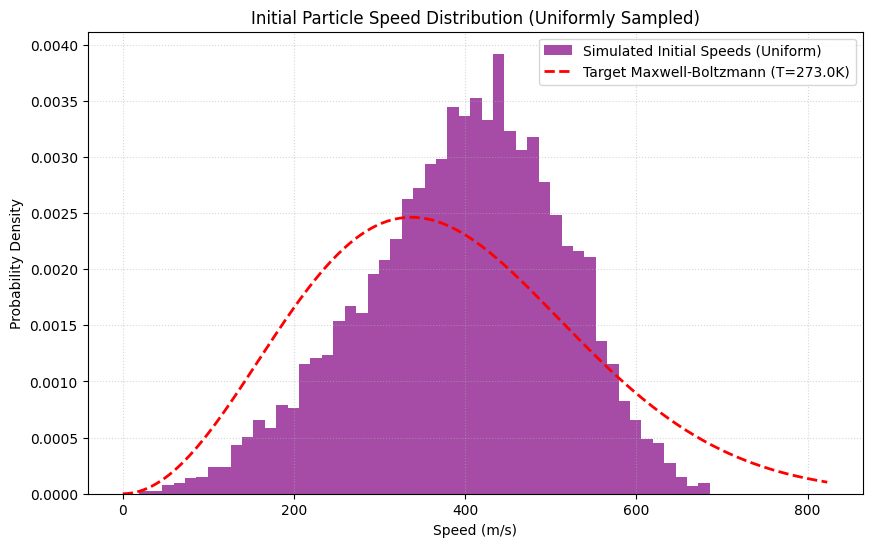


Initial Average Temperature: 273.00 K

Starting main simulation loop...
Step: 50000/500000...
Step: 100000/500000...
Step: 150000/500000...
Step: 200000/500000...
Step: 250000/500000...
Step: 300000/500000...
Step: 350000/500000...
Step: 400000/500000...
Step: 450000/500000...
Step: 500000/500000...
Simulation finished in 291.06 seconds.

Final Average Temperature: 273.00 K
Percentage change in total kinetic energy: 0.0000%
Plotting final distributions against theoretical curve at T_eq = 273.00K...


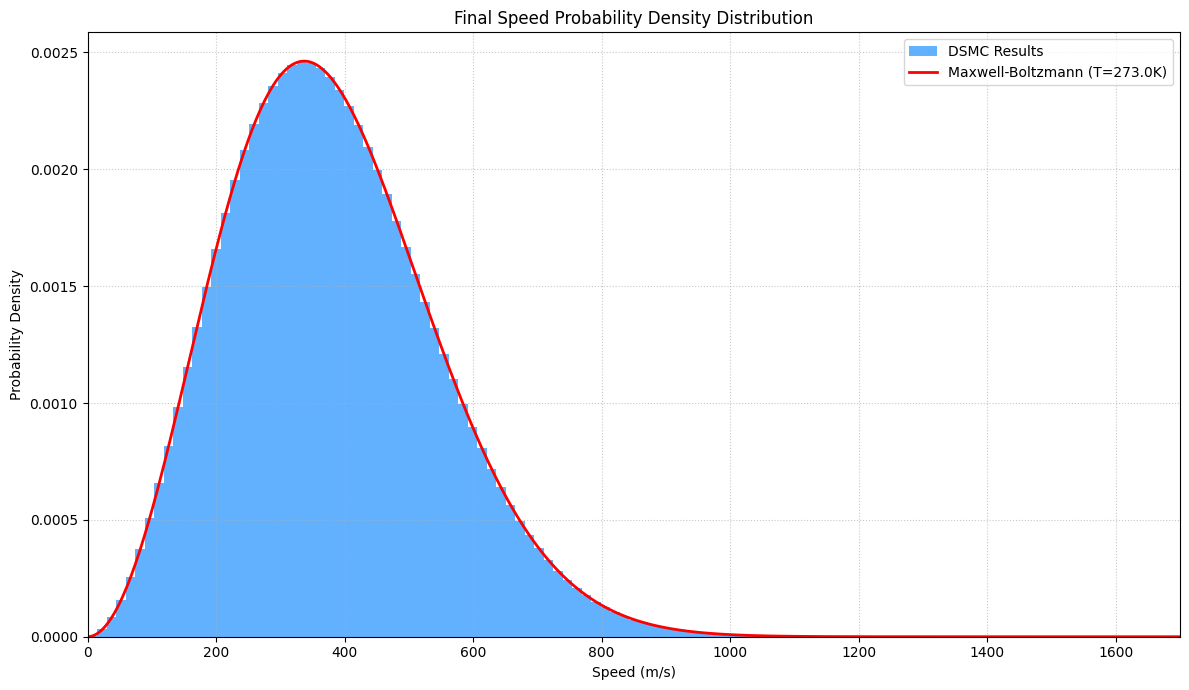

In [2]:
# --- OPTIMIZED DSMC CODE ---
# First, install numba in the environment
# In Google Colab or Jupyter, run: !pip install numba

import numpy as np
import matplotlib.pyplot as plt
import scipy.special
from scipy.integrate import cumulative_trapezoid
import numba # For JIT compilation
import time

# --- Constants and Parameters ---
# Argon (Ar) properties
MOLAR_MASS_AR = 39.948e-3
AVOGADRO_NUM = 6.022e23
MASS_AR = MOLAR_MASS_AR / AVOGADRO_NUM
KB = 1.380649e-23

# VHS model parameters for Argon
D_REF_AR = 4.17e-10
T_REF_AR = 273.0
OMEGA_VHS = 0.81

# --- SIMULATION PARAMETERS ---
LX = 1.0e-6
RHO_INIT = 1.78
T_INIT = 273.0

NUM_CELLS_X = 40
PARTICLES_PER_CELL_INIT = 200 # Increased for better stats with faster code
TOTAL_PARTICLES_SIM = NUM_CELLS_X * PARTICLES_PER_CELL_INIT

# Derived parameters
N_DENSITY_REAL = RHO_INIT / MASS_AR
CELL_VOLUME_CONCEPTUAL = (LX**3) / NUM_CELLS_X
FNUM = (N_DENSITY_REAL * CELL_VOLUME_CONCEPTUAL) / PARTICLES_PER_CELL_INIT

DT = 1.0e-11
TOTAL_TIME = 5.0e-6
SAMPLING_START_TIME = 5.0e-7

NUM_STEPS = int(TOTAL_TIME / DT)
SAMPLING_START_STEP = int(SAMPLING_START_TIME / DT)
SAMPLING_INTERVAL = 50

NTC_VR_MAX_SPEED_MULTIPLIER = 10.0

# --- OPTIMIZATION: Initialization using NumPy arrays ---
def initialize_particles_state():
    """
    Initializes particle properties in a NumPy array.
    State array columns: 0:x, 1:vx, 2:vy, 3:vz
    """
    # Create a 2D NumPy array to hold the state of all particles
    particles = np.zeros((TOTAL_PARTICLES_SIM, 4))
    cell_width = LX / NUM_CELLS_X
    V_MAX_INITIAL = 800.0

    print("Initializing particles using NumPy array from a UNIFORM random distribution...")

    # Vectorized position initialization
    for i in range(NUM_CELLS_X):
        start_idx = i * PARTICLES_PER_CELL_INIT
        end_idx = (i + 1) * PARTICLES_PER_CELL_INIT
        particles[start_idx:end_idx, 0] = i * cell_width + np.random.rand(PARTICLES_PER_CELL_INIT) * cell_width

    # Vectorized velocity initialization (uniform random)
    particles[:, 1:4] = V_MAX_INITIAL * (2.0 * np.random.rand(TOTAL_PARTICLES_SIM, 3) - 1.0)

    # Scale velocities to match target temperature
    current_ke_per_particle = 0.5 * MASS_AR * np.sum(particles[:, 1:4]**2, axis=1)
    current_total_ke = np.sum(current_ke_per_particle)
    target_total_ke = 1.5 * TOTAL_PARTICLES_SIM * KB * T_INIT

    scaling_factor = np.sqrt(target_total_ke / current_total_ke)
    print(f"Scaling all velocities by a factor of {scaling_factor:.4f} to match T_INIT = {T_INIT}K.")
    particles[:, 1:4] *= scaling_factor

    # Plot initial distribution
    initial_speeds = np.sqrt(np.sum(particles[:, 1:4]**2, axis=1))
    plt.figure(figsize=(10, 6))
    plt.hist(initial_speeds, bins=50, density=True, label='Simulated Initial Speeds (Uniform)', color='purple', alpha=0.7)
    v_theory = np.linspace(0, np.max(initial_speeds) * 1.2, 500)
    pv_theory = (4 * np.pi * (MASS_AR / (2 * np.pi * KB * T_INIT))**1.5 * v_theory**2 * np.exp(-MASS_AR * v_theory**2 / (2 * KB * T_INIT)))
    plt.plot(v_theory, pv_theory, 'r--', linewidth=2, label=f'Target Maxwell-Boltzmann (T={T_INIT:.1f}K)')
    plt.title('Initial Particle Speed Distribution (Uniformly Sampled)')
    plt.xlabel('Speed (m/s)'), plt.ylabel('Probability Density'), plt.legend()
    plt.grid(True, linestyle=':', alpha=0.5)
    plt.show()

    return particles

# --- OPTIMIZATION: DSMC Core Functions with NumPy and Numba ---

# Using Numba's JIT compiler for the most performance-critical function
@numba.jit(nopython=True)
def calculate_vhs_cross_section_numba(vr_mag, d_ref, t_ref, omega_vhs):
    if vr_mag < 1e-9:
        return 1e-30
    exponent = omega_vhs - 0.5
    c_ref_sq = 2 * KB * t_ref / MASS_AR
    # Gamma function value is a constant, can be pre-calculated
    # scipy.special.gamma(2.5 - OMEGA_VHS) -> 1.04533
    gamma_val = 1.04533
    d_sq = (d_ref**2) * ((c_ref_sq / vr_mag**2)**exponent) * (1 / gamma_val)
    return np.pi * d_sq

@numba.jit(nopython=True)
def perform_collisions_in_cell_numba(particles, indices_in_cell, cell_vol, dt, fnum, sigma_vr_max):
    num_particles_in_cell = len(indices_in_cell)
    if num_particles_in_cell < 2:
        return

    num_candidate_pairs = (num_particles_in_cell * (num_particles_in_cell - 1) * fnum * sigma_vr_max * dt) / (2.0 * cell_vol)
    num_pairs_to_select = int(np.floor(num_candidate_pairs + np.random.rand()))

    for _ in range(num_pairs_to_select):
        # Choose two distinct random indices from the list of particles in the cell
        idx1_local = np.random.randint(0, num_particles_in_cell)
        idx2_local = np.random.randint(0, num_particles_in_cell)
        while idx1_local == idx2_local:
            idx2_local = np.random.randint(0, num_particles_in_cell)

        # Get the global indices from the particles array
        p1_idx = indices_in_cell[idx1_local]
        p2_idx = indices_in_cell[idx2_local]

        # Relative velocity
        vrx = particles[p1_idx, 1] - particles[p2_idx, 1]
        vry = particles[p1_idx, 2] - particles[p2_idx, 2]
        vrz = particles[p1_idx, 3] - particles[p2_idx, 3]
        vr_mag = np.sqrt(vrx**2 + vry**2 + vrz**2)

        if vr_mag < 1e-9:
            continue

        # Using the Numba-compiled cross-section function
        sigma_t = calculate_vhs_cross_section_numba(vr_mag, D_REF_AR, T_REF_AR, OMEGA_VHS)

        if np.random.rand() < (sigma_t * vr_mag) / sigma_vr_max:
            # Collision accepted
            vcm_x = 0.5 * (particles[p1_idx, 1] + particles[p2_idx, 1])
            vcm_y = 0.5 * (particles[p1_idx, 2] + particles[p2_idx, 2])
            vcm_z = 0.5 * (particles[p1_idx, 3] + particles[p2_idx, 3])

            cos_chi = 2 * np.random.rand() - 1.0
            sin_chi = np.sqrt(1.0 - cos_chi**2)
            phi_chi = 2.0 * np.pi * np.random.rand()

            vr_prime_x = vr_mag * sin_chi * np.cos(phi_chi)
            vr_prime_y = vr_mag * sin_chi * np.sin(phi_chi)
            vr_prime_z = vr_mag * cos_chi

            particles[p1_idx, 1] = vcm_x + 0.5 * vr_prime_x
            particles[p1_idx, 2] = vcm_y + 0.5 * vr_prime_y
            particles[p1_idx, 3] = vcm_z + 0.5 * vr_prime_z

            particles[p2_idx, 1] = vcm_x - 0.5 * vr_prime_x
            particles[p2_idx, 2] = vcm_y - 0.5 * vr_prime_y
            particles[p2_idx, 3] = vcm_z - 0.5 * vr_prime_z

# Other functions adapted for NumPy
def plot_distributions(all_sampled_speeds, final_temp):
    print(f"Plotting final distributions against theoretical curve at T_eq = {final_temp:.2f}K...")
    plt.figure(figsize=(12, 7))
    plt.hist(all_sampled_speeds, bins=100, density=True, label='DSMC Results', alpha=0.7, color='dodgerblue')

    v_max_range = np.max(all_sampled_speeds) * 1.15
    v_theory = np.linspace(0, v_max_range, 500)
    pv_theory = (4 * np.pi * (MASS_AR / (2 * np.pi * KB * final_temp))**1.5 * v_theory**2 * np.exp(-MASS_AR * v_theory**2 / (2 * KB * final_temp)))

    plt.plot(v_theory, pv_theory, 'r-', linewidth=2, label=f'Maxwell-Boltzmann (T={final_temp:.1f}K)')
    plt.xlabel('Speed (m/s)'), plt.ylabel('Probability Density')
    plt.title('Final Speed Probability Density Distribution'), plt.legend()
    plt.grid(True, linestyle=':', alpha=0.7)
    plt.xlim(left=0, right=v_max_range), plt.ylim(bottom=0)
    plt.tight_layout()
    plt.savefig("final_pdf_distribution_optimized.png")
    plt.show()

# --- Main Simulation ---
if __name__ == "__main__":
    print("--- OPTIMIZED DSMC 1D Relaxation Simulation (NumPy + Numba) ---")

    # Estimate (sigma*vr)_max once
    vr_max_estimate = NTC_VR_MAX_SPEED_MULTIPLIER * np.sqrt(KB * T_INIT / MASS_AR)
    sigma_at_vr_max = calculate_vhs_cross_section_numba(vr_max_estimate, D_REF_AR, T_REF_AR, OMEGA_VHS)
    SIGMA_VR_MAX_GLOBAL = sigma_at_vr_max * vr_max_estimate
    print(f"Estimated (sigma*vr)_max for NTC: {SIGMA_VR_MAX_GLOBAL:.2e} m^3/s")

    particles = initialize_particles_state()

    initial_ke = 0.5 * MASS_AR * np.sum(particles[:, 1:4]**2)
    initial_temp = (2.0/3.0) * (initial_ke / TOTAL_PARTICLES_SIM) / KB
    print(f"\nInitial Average Temperature: {initial_temp:.2f} K")

    sampled_speeds_accumulator = []

    start_time = time.time()
    print("\nStarting main simulation loop...")

    # Pre-calculate constants
    cell_width = LX / NUM_CELLS_X

    # A dummy call to compile the Numba function before the main loop
    perform_collisions_in_cell_numba(particles, np.array([0,1], dtype=np.int64), CELL_VOLUME_CONCEPTUAL, DT, FNUM, SIGMA_VR_MAX_GLOBAL)

    for step in range(1, NUM_STEPS + 1):
        # --- OPTIMIZATION: Vectorized operations ---
        particles[:, 0] += particles[:, 1] * DT
        particles[:, 0] %= LX # Vectorized periodic boundary condition

        # --- OPTIMIZATION: Efficient cell sorting ---
        cell_indices = (particles[:, 0] / cell_width).astype(np.int64)
        sorted_particle_indices = np.argsort(cell_indices)

        # Find the boundaries of each cell
        cell_counts = np.bincount(cell_indices, minlength=NUM_CELLS_X)
        cell_start_indices = np.concatenate(([0], np.cumsum(cell_counts[:-1])))

        # Collision loop (now much faster with Numba)
        for i in range(NUM_CELLS_X):
            start = cell_start_indices[i]
            end = start + cell_counts[i]
            indices_in_cell_i = sorted_particle_indices[start:end]
            perform_collisions_in_cell_numba(
                particles, indices_in_cell_i,
                CELL_VOLUME_CONCEPTUAL, DT, FNUM, SIGMA_VR_MAX_GLOBAL
            )

        # Sampling
        if step >= SAMPLING_START_STEP and step % SAMPLING_INTERVAL == 0:
            speeds = np.sqrt(np.sum(particles[:, 1:4]**2, axis=1))
            sampled_speeds_accumulator.extend(speeds)

        if step % (NUM_STEPS // 10) == 0:
            print(f"Step: {step}/{NUM_STEPS}...")

    end_time = time.time()
    print(f"Simulation finished in {end_time - start_time:.2f} seconds.\n")

    # --- Final Analysis ---
    final_ke = 0.5 * MASS_AR * np.sum(particles[:, 1:4]**2)
    final_temp = (2.0/3.0) * (final_ke / TOTAL_PARTICLES_SIM) / KB
    print(f"Final Average Temperature: {final_temp:.2f} K")
    energy_change_percent = ((final_ke - initial_ke) / initial_ke) * 100
    print(f"Percentage change in total kinetic energy: {energy_change_percent:.4f}%")

    plot_distributions(np.array(sampled_speeds_accumulator), final_temp)